In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("bengaluru.csv")

In [3]:
# # for generating profile report of our dataset
# report = ProfileReport(df)
# report.to_file('report.html') 

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### Dropping those features that we do not need to train our model

In [9]:
df1 = df.drop(['area_type','availability','society'],axis=1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

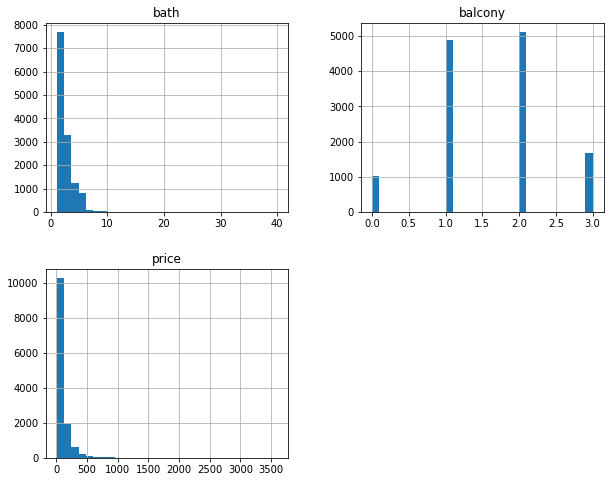

In [10]:
df1.hist(bins=30,figsize=(10,8))

## Handling missing values:

In [11]:
df1.isnull().sum()  # This will give us total null values that are in each column

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
df2 = df1.dropna()  # Dropping all the null values that were in our data we can apply other functions too its depend on us
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   size        12710 non-null  object 
 2   total_sqft  12710 non-null  object 
 3   bath        12710 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       12710 non-null  float64
dtypes: float64(3), object(3)
memory usage: 695.1+ KB


## Feature Engineering

It helps us in changing already present feature into new ones like:
        
        i)Adding new columns by splitting previous ones into simple ones
        ii)Adding dummy columns
        

In [13]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [14]:
# Adding new column in place of size which contains only int values
df2['bhk'] = df2.loc[:,('size')].apply(lambda x: int(x.split(' ')[0]))  # splitting from zeroth index of size which are integers
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   size        12710 non-null  object 
 2   total_sqft  12710 non-null  object 
 3   bath        12710 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       12710 non-null  float64
 6   bhk         12710 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 794.4+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_5724\3814143019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2.loc[:,('size')].apply(lambda x: int(x.split(' ')[0]))  # splitting from zeroth index of size which are integers


In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [16]:
# Its telling us if we have numbers other than float in our square_feet column
df2[~df2['total_sqft'].apply(is_float)].head() # Will return those values from square_foot that are not in float

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [17]:
# This will take square foot column and convert those values into float which are as object and are in range
def cnvrt_to_float(x):
    value = x.split('-')
    if len(value) == 2:
        return (float(value[0])+float(value[1]))/2    
    try:
        return float(x)
    except:
        return None
    

In [18]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(cnvrt_to_float)
df3 = df3[df3.total_sqft.notnull()] # This will return us values of our data
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12668 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12668 non-null  object 
 1   size        12668 non-null  object 
 2   total_sqft  12668 non-null  float64
 3   bath        12668 non-null  float64
 4   balcony     12668 non-null  float64
 5   price       12668 non-null  float64
 6   bhk         12668 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 791.8+ KB


In [19]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [20]:
df3['Price_per_square_feet'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [21]:
df3.Price_per_square_feet.describe()

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: Price_per_square_feet, dtype: float64

## Converting categorical varable into dummies

In [22]:
df4 = df3.copy()
location_stats = df.location.value_counts()
location_less_than_10 = location_stats[location_stats <= 10]

In [23]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df4.location.unique())# Now we have only 242 categorical columns so its easy to create these dummy variables than 1259
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


## Removal of outliers

In [24]:
df4[df4.total_sqft/df4.bhk<300]

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [25]:
df4.shape

(12668, 8)

In [26]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12013, 8)

In [27]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
df5.Price_per_square_feet.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: Price_per_square_feet, dtype: float64

### Removal of outliers using mean and standard deviation

In [29]:
import numpy as np
def remove_outlier_pps(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf.Price_per_square_feet)
        sd = np.std(subdf.Price_per_square_feet)
        reduced_df = subdf[(subdf.Price_per_square_feet > (mean-sd)) & (subdf.Price_per_square_feet <= (mean+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # will concat and keep the index in order
    return df_out

In [30]:
df5.shape

(12013, 8)

In [31]:
df6 = remove_outlier_pps(df5)
df6.shape

(9845, 8)

In [32]:
df6.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509


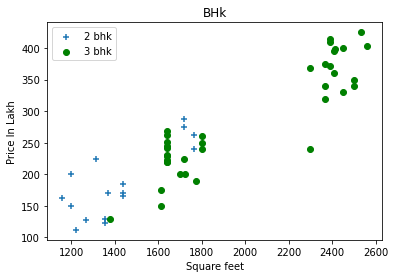

In [33]:
import matplotlib.pyplot as plt
def plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location== location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='+',label = '2 bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color = 'g',label ='3 bhk')
    plt.legend()
    plt.title("BHk")
    plt.xlabel('Square feet')
    plt.ylabel('Price In Lakh')

# someone told that in Rajaji Nagar price of houses of 2 rooms more than 3 rooms that's why we are checking them as outliers    
plot(df6,'Rajaji Nagar') 


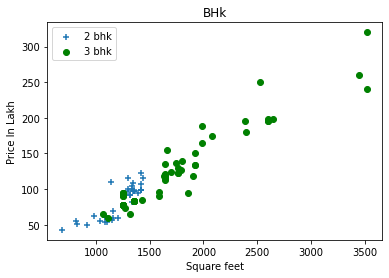

In [34]:
plot(df6,"Hebbal") # This location also has some outliers exactly like Rajaji Nagar

#### Now removing those outliers in which price of 2 rooms greater than 3

In [35]:
def remove_bhk_outliers(df):
    exclude_index = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.Price_per_square_feet),
                'sd' : np.std(bhk_df.Price_per_square_feet),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_index = np.append(exclude_index,bhk_df[bhk_df.Price_per_square_feet < (stats['mean'])].index.values)
    return df.drop(exclude_index,axis=0)
df7 = remove_bhk_outliers(df6)
df7.shape

(7052, 8)

In [36]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699


### After removing outliers


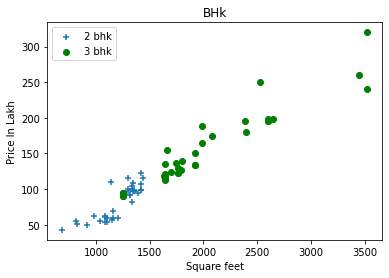

In [37]:
plot(df7,"Hebbal") 

(7052, 8)

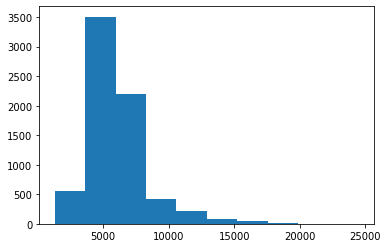

In [38]:
plt.hist(df7.Price_per_square_feet)
df7.shape

(array([4.707e+03, 1.665e+03, 4.370e+02, 1.420e+02, 7.000e+01, 2.500e+01,
        5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

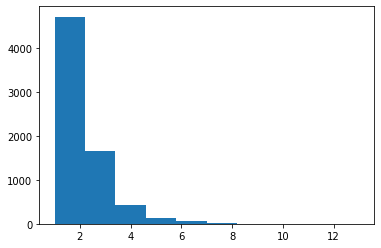

In [39]:
plt.hist(df7.bath)

### Removing outliers using bathroom.
   According to our business expert we cannot have bathrooms in the size of bhk+2

In [40]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_square_feet
1558,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6462,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8101,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [41]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(6985, 8)

In [42]:
df8 = df8.drop(['Price_per_square_feet','size'],axis = 1)
df8.head()

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


### One Hot Encoding
    Getting dummy columns for removing categorical variables

In [43]:
dummy = pd.get_dummies(df8.location)
# we can drop one column of our own choice bcz that will show 1 or zero in other certain columns and can be taken into review
# with other columns so thats why we mostly drop one of the columns from our dummy variables
dummy.drop('other',axis=1) 

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df9 = pd.concat([df8,dummy],axis=1)
df9 = df9.drop(['location'],axis=1)
df9

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,1155.0,2.0,1.0,64.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9837,1200.0,2.0,3.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9838,1800.0,1.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9841,1353.0,2.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Going for model building

In [45]:
df9.shape

(6985, 247)

In [46]:
x = df9.drop('price',axis=1)
y = df9.price

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
len(y_train)

5588

In [49]:
len(y_test)

1397

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
predict = model.predict(x_test)
model.score(x_test,y_test)

0.7771077592610608

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
score = cross_val_score(LinearRegression(),x,y,cv = shuffle)
# score1 = cross_val_score(DecisionTreeRegressor(),x,y,cv = shuffle)
# score2 = cross_val_score(RandomForestRegressor(),x,y,cv = shuffle)
# using cross validation we can always get better score and save from over_fitting

In [53]:
score.mean()

0.8190498281104756

In [54]:
predict

array([80.84179306, 59.14334869, 49.10518074, ..., 68.22328949,
       25.64154053, 93.7716608 ])

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predict,y_test)
np.sqrt(mse)
# This model is not good because its root_mean_squared error is about 40 so its cannot be take as a good model

42.63679722270705

### In above models Linear-Regression gives the best score

## Saving our model
  
      We can also use pickle module to save our ML model

In [56]:
from joblib import dump
dump(model,'India_Housing_price_predictor.joblib')

['India_Housing_price_predictor.joblib']

## Importig model to use it

In [57]:
from joblib import load
model = load('India_Housing_price_predictor.joblib')

In [58]:
model.score(x_test,y_test)

0.7771077592610608

In [59]:
model.predict(x_test)

array([80.84179306, 59.14334869, 49.10518074, ..., 68.22328949,
       25.64154053, 93.7716608 ])